In [16]:
%matplotlib inline

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
# load China polygon
rgn = gpd.read_file('https://geo.datav.aliyun.com/areas_v2/bound/100000_full.json')
# Administrative divisions at provincial level in China (polygon)

rgn



adcode      name  childrenNum     level              parent  \
0   110000       北京市         16.0  province  {'adcode': 100000}   
1   120000       天津市         16.0  province  {'adcode': 100000}   
2   130000       河北省         11.0  province  {'adcode': 100000}   
3   140000       山西省         11.0  province  {'adcode': 100000}   
4   150000    内蒙古自治区         12.0  province  {'adcode': 100000}   
5   210000       辽宁省         14.0  province  {'adcode': 100000}   
6   220000       吉林省          9.0  province  {'adcode': 100000}   
7   230000      黑龙江省         13.0  province  {'adcode': 100000}   
8   310000       上海市         16.0  province  {'adcode': 100000}   
9   320000       江苏省         13.0  province  {'adcode': 100000}   
10  330000       浙江省         11.0  province  {'adcode': 100000}   
11  340000       安徽省         16.0  province  {'adcode': 100000}   
12  350000       福建省          9.0  province  {'adcode': 100000}   
13  360000       江西省         11.0  province  {'adcode': 100000}   
14  370000       山东省         16.0  province  {'adcode': 100000}   
15  410000       河南省         18.0  province  {'adcode': 100000}   
16  420000       湖北省         17.0  province  {'adcode': 100000}   
17  430000       湖南省         14.0  province  {'adcode': 100000}   
18  440000       广东省         21.0  province  {'adcode': 100000}   
19  450000   广西壮族自治区         14.0  province  {'adcode': 100000}   
20  460000       海南省         19.0  province  {'adcode': 100000}   
21  500000       重庆市         38.0  province  {'adcode': 100000}   
22  510000       四川省         21.0  province  {'adcode': 100000}   
23  520000       贵州省          9.0  province  {'adcode': 100000}   
24  530000       云南省         16.0  province  {'adcode': 100000}   
25  540000     西藏自治区          7.0  province  {'adcode': 100000}   
26  610000       陕西省         10.0  province  {'adcode': 100000}   
27  620000       甘肃省         14.0  province  {'adcode': 100000}   
28  630000       青海省          8.0  province  {'adcode': 100000}   
29  640000   宁夏回族自治区          5.0  province  {'adcode': 100000}   
30  650000  新疆维吾尔自治区         24.0  province  {'adcode': 100000}   
31  710000       台湾省          0.0  province  {'adcode': 100000}   
32  810000   香港特别行政区         18.0  province  {'adcode': 100000}   
33  820000   澳门特别行政区          8.0  province  {'adcode': 100000}   
34  100000                    NaN      None                None   

    subFeatureIndex adchar                                           geometry  
0               0.0   None  MULTIPOLYGON (((117.34861 40.58114, 117.34861 ...  
1               1.0   None  MULTIPOLYGON (((117.76560 39.40053, 117.69970 ...  
2               2.0   None  MULTIPOLYGON (((117.46749 40.64974, 117.46749 ...  
3               3.0   None  MULTIPOLYGON (((114.13464 40.73731, 114.16236 ...  
4               4.0   None  POLYGON ((111.12578 39.36630, 111.08759 39.376...  
5               5.0   None  MULTIPOLYGON (((119.55799 42.28907, 119.55799 ...  
6               6.0   None  MULTIPOLYGON (((126.18857 41.11487, 126.18796 ...  
7               7.0   None  MULTIPOLYGON (((123.56960 46.22382, 123.56960 ...  
8               8.0   None  MULTIPOLYGON (((120.90135 31.01733, 120.89088 ...  
9               9.0   None  MULTIPOLYGON (((117.31165 34.56169, 117.31165 ...  
10             10.0   None  MULTIPOLYGON (((118.43390 28.28834, 118.48009 ...  
11             11.0   None  MULTIPOLYGON (((116.59963 34.01432, 116.59963 ...  
12             12.0   None  MULTIPOLYGON (((119.00487 24.97001, 119.00733 ...  
13             13.0   None  MULTIPOLYGON (((118.19306 29.39547, 118.20538 ...  
14             14.0   None  MULTIPOLYGON (((116.37420 34.64001, 116.33416 ...  
15             15.0   None  MULTIPOLYGON (((115.50880 32.46876, 115.50942 ...  
16             16.0   None  MULTIPOLYGON (((111.04570 33.16985, 111.08882 ...  
17             17.0   None  MULTIPOLYGON (((109.48245 26.02979, 109.45288 ...  
18             18.0   None  MULTIPOLYGON (((109.78549 21.45673, 109.788

In [ ]:
china = rgn[rgn.level.isna() == False]
# South China Sea Nine-dash line (polygon)
nine_lines = rgn[rgn.level.isna()]

In [27]:
nine_lines

adcode name  childrenNum level parent  subFeatureIndex adchar  \
34  100000               NaN  None   None              NaN     JD   

                                             geometry  
34  MULTIPOLYGON (((122.51865 23.46079, 122.51742 ...

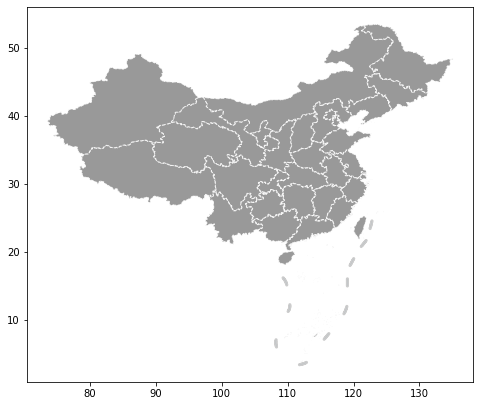

In [11]:
# Drawing features
fig, ax = plt.subplots(figsize=(8, 8))
ax = china.plot(ax=ax,
                facecolor='grey',
                edgecolor='white',
                linestyle='--',
                alpha=0.8,
                label='Administrative divisions')
ax = nine_lines.plot(ax=ax,
                    edgecolor='grey',
                    linewidth=3,
                    alpha=0.4,
                    label='South China Sea Nine-dash line')

# Error in normal writing: No handles with labels found to put in legend.
# ax.legend(title='Legend', loc='lower left', ncol=1, shadow=True)

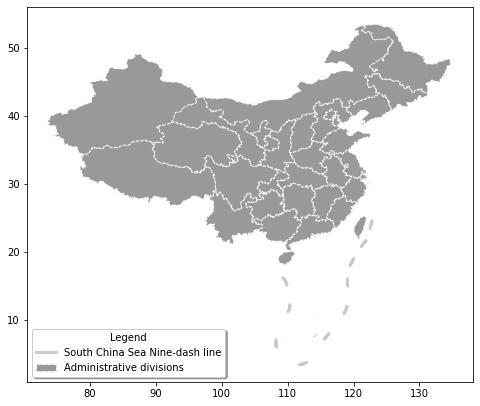

In [25]:
# Alternative solution for "Polygon handles not passing to legend"
import matplotlib.patches as mpatches
import matplotlib.lines as mlines # requires the import of polygon patches

fig, ax = plt.subplots(figsize=(8, 8))
ax = china.plot(ax=ax,
                facecolor='grey',
                edgecolor='white',
                linestyle='--',
                alpha=0.8,
                label='Administrative divisions')
ax = nine_lines.plot(ax=ax,
                    edgecolor='grey',
                    linewidth=3,
                    alpha=0.4,
                    label='South China Sea Nine-dash line')

pmark = mpatches.Patch(facecolor='grey',
                       edgecolor='white',
                       linestyle='--',
                       alpha=0.8,
                       label='Administrative divisions')
lmark = mlines.Line2D([],
                      [],
                      color='grey',
                      linewidth=3,
                      alpha=0.4,
                      label='South China Sea Nine-dash line')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=[*handles,
                   lmark,
                   pmark],
          title="Legend",
          loc='lower left',
          ncol=1,
          shadow=True)

# show figure
plt.rcParams['legend.title_fontsize'] = 10
plt.show()